<h1> Assignment 2 <h1>

<h2> Exercise 1 <h2>

Below code is for dataset - Retail 1

          0.005  0.010  0.020  0.050
Apriori   75256  17436   3074    733
FPGrowth    967   1155    889    842
Eclat       936    764    717    702


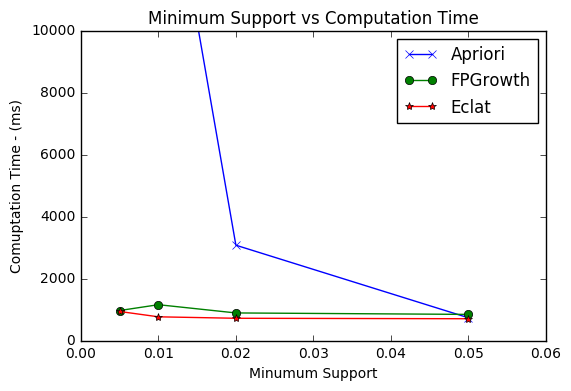

In [50]:
import re
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


path  = "C:/Nimesh/Suggestive Reads/IIT Hyderabad/Analytic Databases/Assignment/Assignment2/"
    
def run_algo(algo,min_support):
    # java -jar spmf.jar run Algorithm_name input.txt output.txt 50%
    subprocess.call(["java", "-jar", path+"spmf.jar", "run", algo , path+"retail1.txt" , path+algo+"_output.txt", str(min_support)])
    prog_output = subprocess.getoutput(["java", "-jar", path+"spmf.jar", "run", algo , path+"retail1.txt" , path+algo+"_output.txt", str(min_support)])
    Total_Time = int(re.findall('Total time ~ \d+', prog_output)[0].split('~')[1])
    return Total_Time
    
#Line Graph plot for three algorithms (1) Apriori, (2) FP-Growth, and (3) ECLat (mining using vertical data format)
Apriori_time_list = []
FPGrowth_time_list = []
Eclat_time_list = []

minimum_support = [0.005,0.01,0.02,0.05]

for minsup in minimum_support:
    Apriori_time_list.append(run_algo("Apriori",minsup))
    FPGrowth_time_list.append(run_algo('FPGrowth_itemsets',minsup))
    Eclat_time_list.append(run_algo('Eclat',minsup))

df= pd.DataFrame(index = ['Apriori','FPGrowth','Eclat'],columns = minimum_support,
                data=np.array(Apriori_time_list+FPGrowth_time_list+Eclat_time_list).reshape(3,4))
print(df)
    
plt.figure()
plt.plot(minimum_support,Apriori_time_list,label = 'Apriori',marker = 'x')
plt.plot(minimum_support,FPGrowth_time_list,label = 'FPGrowth',marker = 'o')
plt.plot(minimum_support,Eclat_time_list,label = 'Eclat',marker = '*')
plt.title('Minimum Support vs Computation Time')
plt.xlabel('Minumum Support')
plt.ylabel('Comuptation Time - (ms)')
plt.legend(loc = 'best')
plt.ylim(0,10000)
plt.show()

Below code is for dataset - Retail 2

          0.005  0.010  0.020  0.050
Apriori   17448   2450    450    322
FPGrowth    837    582    525    538
Eclat      1915   1850   2002   2275


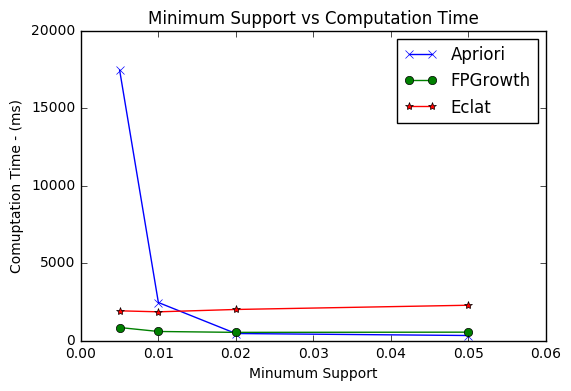

In [53]:
import re
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


path  = "C:/Nimesh/Suggestive Reads/IIT Hyderabad/Analytic Databases/Assignment/Assignment2/"
    
def run_algo(algo,min_support):
    # java -jar spmf.jar run Algorithm_name input.txt output.txt 50%
    subprocess.call(["java", "-jar", path+"spmf.jar", "run", algo , path+"retail2.txt" , path+algo+"_output.txt", str(min_support)])
    prog_output = subprocess.getoutput(["java", "-jar", path+"spmf.jar", "run", algo , path+"retail2.txt" , path+algo+"_output.txt", str(min_support)])
    Total_Time = int(re.findall('Total time ~ \d+', prog_output)[0].split('~')[1])
    return Total_Time
    
#Line Graph plot for three algorithms (1) Apriori, (2) FP-Growth, and (3) ECLat (mining using vertical data format)
Apriori_time_list = []
FPGrowth_time_list = []
Eclat_time_list = []

minimum_support = [0.005,0.01,0.02,0.05]

for minsup in minimum_support:
    Apriori_time_list.append(run_algo("Apriori",minsup))
    FPGrowth_time_list.append(run_algo('FPGrowth_itemsets',minsup))
    Eclat_time_list.append(run_algo('Eclat',minsup))

df= pd.DataFrame(index = ['Apriori','FPGrowth','Eclat'],columns = minimum_support,
                data=np.array(Apriori_time_list+FPGrowth_time_list+Eclat_time_list).reshape(3,4))

print(df)

    
plt.figure()
plt.plot(minimum_support,Apriori_time_list,label = 'Apriori',marker = 'x')
plt.plot(minimum_support,FPGrowth_time_list,label = 'FPGrowth',marker = 'o')
plt.plot(minimum_support,Eclat_time_list,label = 'Eclat',marker = '*')
plt.title('Minimum Support vs Computation Time')
plt.xlabel('Minumum Support')
plt.ylabel('Comuptation Time - (ms)')
plt.legend(loc = 'best')
plt.ylim(0,20000)
plt.show()

<h2> Exercise 2 <h2>

Below code is for dataset - Retail 1

In [1]:
import re
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path  = "C:/Nimesh/Suggestive Reads/IIT Hyderabad/Analytic Databases/Assignment/Assignment2/"
    
def _run_algo(algo,min_support):
    # java -jar spmf.jar run Algorithm_name input.txt output.txt 50%
    subprocess.call(["java", "-jar", path+"spmf.jar", "run", algo , path+"retail1.txt" , path+algo+"_output.txt", str(min_support)])
    prog_output = subprocess.getoutput(["java", "-jar", path+"spmf.jar", "run", algo , path+"retail1.txt" , path+algo+"_output.txt", str(min_support)])
    return prog_output
   
def _Number_Of_Itemsets(algo,min_support):
    N_Itemsets = int(re.findall('\d+', _run_algo(algo,min_support))[-2])
    return N_Itemsets

def _Total_Time(algo,min_support):
    T_Time = int(re.findall('\d+', _run_algo(algo,min_support))[-1])
    return T_Time


# Comparision of performance of three algorithms (1) FP-Growth, (2) FPClose, and (3) FPMax
FPGrowth_time_list = []
FPClose_time_list = []
FPMax_time_list = []

FPGrowth_Itemsets_list = []
FPClose_Itemsets_list = []
FPMax_Itemsets_list = []

minimum_support = [0.005,0.01,0.02,0.05]

for minsup in minimum_support:
    FPGrowth_time_list.append(_Total_Time("FPGrowth_itemsets",minsup))
    FPClose_time_list.append(_Total_Time('FPClose',minsup))
    FPMax_time_list.append(_Total_Time('FPMax',minsup))
    FPGrowth_Itemsets_list.append(_Number_Of_Itemsets("FPGrowth_itemsets",minsup))
    FPClose_Itemsets_list.append(_Number_Of_Itemsets('FPClose',minsup))
    FPMax_Itemsets_list.append(_Number_Of_Itemsets('FPMax',minsup))

    
list_all =  FPGrowth_time_list+FPGrowth_Itemsets_list+FPClose_time_list+FPClose_Itemsets_list+FPMax_time_list+FPMax_Itemsets_list
df= pd.DataFrame(columns = ['min-sup = 0.05%','min-sup = 1%','min-sup = 2%','min-sup = 5%'],data=np.array(list_all).reshape(6,4))

df['Algorithm'] = ['FPGrowth','FPGrowth','FPClose','FPClose','FPMax','FPMax']
df['Measure'] = ['Time','#Itemsets','Time','#Itemsets','Time','#Itemsets']
df = df.set_index(['Algorithm','Measure'])

df

min-sup = 0.05%  min-sup = 1%  min-sup = 2%  min-sup = 5%
Algorithm Measure                                                             
FPGrowth  Time                  1232          1092          1077           999
          #Itemsets              396           140            45            10
FPClose   Time                  1232          1123          1061           905
          #Itemsets              323           131            45            10
FPMax     Time                  1326          1076          1014          1280
          #Itemsets              175            80            33             8

Below code is for dataset - Retail 2

In [1]:
import re
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path  = "C:/Nimesh/Suggestive Reads/IIT Hyderabad/Analytic Databases/Assignment/Assignment2/"
    
def _run_algo(algo,min_support):
    # java -jar spmf.jar run Algorithm_name input.txt output.txt 50%
    subprocess.call(["java", "-jar", path+"spmf.jar", "run", algo , path+"retail2.txt" , path+algo+"_output.txt", str(min_support)])
    prog_output = subprocess.getoutput(["java", "-jar", path+"spmf.jar", "run", algo , path+"retail2.txt" , path+algo+"_output.txt", str(min_support)])
    return prog_output
   
def _Number_Of_Itemsets(algo,min_support):
    N_Itemsets = int(re.findall('\d+', _run_algo(algo,min_support))[-2])
    return N_Itemsets

def _Total_Time(algo,min_support):
    T_Time = int(re.findall('\d+', _run_algo(algo,min_support))[-1])
    return T_Time


# Comparision of performance of three algorithms (1) FP-Growth, (2) FPClose, and (3) FPMax
FPGrowth_time_list = []
FPClose_time_list = []
FPMax_time_list = []

FPGrowth_Itemsets_list = []
FPClose_Itemsets_list = []
FPMax_Itemsets_list = []

minimum_support = [0.005,0.01,0.02,0.05]

for minsup in minimum_support:
    FPGrowth_time_list.append(_Total_Time("FPGrowth_itemsets",minsup))
    FPClose_time_list.append(_Total_Time('FPClose',minsup))
    FPMax_time_list.append(_Total_Time('FPMax',minsup))
    FPGrowth_Itemsets_list.append(_Number_Of_Itemsets("FPGrowth_itemsets",minsup))
    FPClose_Itemsets_list.append(_Number_Of_Itemsets('FPClose',minsup))
    FPMax_Itemsets_list.append(_Number_Of_Itemsets('FPMax',minsup))

    
list_all =  FPGrowth_time_list+FPGrowth_Itemsets_list+FPClose_time_list+FPClose_Itemsets_list+FPMax_time_list+FPMax_Itemsets_list
df= pd.DataFrame(columns = ['min-sup = 0.05%','min-sup = 1%','min-sup = 2%','min-sup = 5%'],data=np.array(list_all).reshape(6,4))

df['Algorithm'] = ['FPGrowth','FPGrowth','FPClose','FPClose','FPMax','FPMax']
df['Measure'] = ['Time','#Itemsets','Time','#Itemsets','Time','#Itemsets']
df = df.set_index(['Algorithm','Measure'])

df

min-sup = 0.05%  min-sup = 1%  min-sup = 2%  min-sup = 5%
Algorithm Measure                                                             
FPGrowth  Time                  1076           860           671           687
          #Itemsets              580           159            55            16
FPClose   Time                  1270           843           671           670
          #Itemsets              580           159            55            16
FPMax     Time                  1279           810           687           733
          #Itemsets              284            78            20             4

<h2> Exercise 3 <h2>

In [38]:
def MSApriori_Python(input_file,delta,MSD):
    'This code will implement the MSApriori algorthm in python'
    
    import numpy as np
    import pandas as pd
    from collections import Counter

    
    with open(input_file,'r') as f:
        data = f.readlines()
        number_of_transactions = len(data)
    

    # Creating list of all items 
    from itertools import chain
    L = [transaction.split() for transaction in data]   # First pass
    L = list(chain.from_iterable(L)) 

    # Counting frequency of each item in all the transaction
    from collections import Counter
    L_count = Counter(L)

    # As per the assignement ,To set the minimum support for each item 
    # Assign a MIS value to each item according to its actual support/frequency in the data set T. 
    # For example, if the actual support of item i in T is sup(𝑖), 
    # then the MIS value for i may be computed with 𝛿×sup(𝑖), where 𝛿 is a parameter (0≤𝛿≤1) 
    # and is the same for all items in T.
    
    MIS = {}
    for k in L_count.keys():
        MIS[k] = ((L_count[k] * delta)/number_of_transactions )
    
    frequent_itemset = []

#   Level 2 Generation  
    from itertools import combinations
    F2 = [combinations(transaction.split(),2) for transaction in data]
    F2 = list(chain.from_iterable(F2))
    F2_count = Counter(F2)
    F2_count_copy = dict(F2_count)
    for itemset in F2_count.keys():
        item_list = sorted({itemset[0]:MIS[itemset[0]],itemset[1]:MIS[itemset[1]]}.items(),key = lambda x:x[1])
        if (L_count[item_list[0][0]]/number_of_transactions <= item_list[0][1]) or  abs(L_count[item_list[0][0]]/number_of_transactions - L_count[item_list[1][0]]/number_of_transactions) >= MSD:
            del F2_count_copy[itemset]
    frequent_itemset.append(F2_count_copy)

    from itertools import combinations

    # Find minimum MIS value
    MIN_MIS_DICT = dict(MIS)
    for k in MIS.keys():
        if MIS[k] != min(MIS.values()):
            del MIN_MIS_DICT[k]

#   MS Candidate Gereration
    for item in range(len(L_count)-3):
        F = [combinations(transaction.split(),item+3) for transaction in data]
        F = list(chain.from_iterable(F))
        F_count = Counter(F)
        F_count_copy = dict(F_count)  
        for itemset in F_count.keys():
            subsets = [combinations(itemset,len(itemset)-1)]
            subsets = list(chain.from_iterable(subsets))
            for sets in subsets:
                if len(sets) == 2:
                    if sets not in F2:
                        del F_count_copy[itemset]
                        break
                elif len(sets) > 2:
                    if sets not in frequent_itemset[item]:
                        del F_count_copy[itemset]
        frequent_itemset.append(F_count_copy)

#   Support Difference Constraint
    frequent_itemset_copy = []
    for elements in frequent_itemset:
        minimum_support_list = []
        for itemsets in elements.keys():
            elements_copy = dict(elements)
            for item in itemsets:
                minimum_support_list.append(MIS[item])
            if max(minimum_support_list)- min(minimum_support_list)>= MSD:
                del elements_copy[itemsets]
        frequent_itemset_copy.append(elements_copy)
    
    return frequent_itemset_copy

#   Cannot-be-together Constraint
def cannotBeTogether(constraint_items_list, frequent_itemsets):
    x = []
    for itemsets in frequent_itemsets:
        for constraint_item in constraint_item_list:
            itemsets_copy = itemsets[:]
            if constraint_item in itemsets:
                del itemsets_copy[constraint_item]
        x.append(itemsets_copy)        
    return itemsets_copy   

#   must have Constraint
def mustHave(constraint_items_list, frequent_itemsets):
    x = []
    for itemsets in frequent_itemsets:
        for constraint_item in constraint_item_list:
            itemsets_copy = itemsets[:]
            if constraint_item not in itemsets:
                del itemsets_copy[constraint_item]
        x.append(itemsets_copy)        
    return itemsets_copy
            
    
if __name__ == '__main__':
    import time
    start = time.time()
    
    path  = "C:/Nimesh/Suggestive Reads/IIT Hyderabad/Analytic Databases/Assignment/Assignment2/"
    
    frequent_itemset = MSApriori_Python(path+'contextIGB.txt',0.5,0.2)
    print(frequent_itemset)
    print('total time = %i minutes and %i seconds' %(((time.time()-start)/60),((time.time()-start)%60)))

[{('1', '4'): 3, ('1', '5'): 4, ('3', '5'): 3, ('2', '5'): 5, ('3', '4'): 2, ('1', '3'): 2, ('4', '5'): 3}, {('1', '2', '5'): 4, ('1', '3', '4'): 1, ('3', '4', '5'): 1, ('2', '4', '5'): 3, ('2', '3', '5'): 3, ('1', '2', '3'): 2, ('1', '4', '5'): 3, ('1', '3', '5'): 2, ('1', '2', '4'): 3, ('2', '3', '4'): 2}, {('1', '2', '4', '5'): 3, ('1', '3', '4', '5'): 1, ('1', '2', '3', '4'): 1, ('2', '3', '4', '5'): 1, ('1', '2', '3', '5'): 2}]
total time = 0 minutes and 0 seconds


<h2> Exercise 4 <h2>

Use the MSApriori algorithm available in the SPMF library. Unlike Exercise 3, here you only need to consider the multiple minimum support and support difference constraint. Generate the multiple minimum support using the approach described in Exercise 3.Note: Support difference constraint is not part of SPMF. Either the same can be implemented by changing candidate gen in SPMF or take the result from SPMF and apply the constraint on the result.

In [358]:
import re
import subprocess
import pandas as pd
import numpy as np

path  = "C:/Nimesh/Suggestive Reads/IIT Hyderabad/Analytic Databases/Assignment/Assignment2/"
    
# java -jar spmf.jar run MSApriori contextIGB.txt output.txt 0.4 0.2
prog_output = subprocess.getoutput(["java", "-jar", path+"spmf.jar", "run", "MSApriori", path+"retail1.txt" , path+"MSApriori"+"_output.txt", '0.004','0.02'])
prog_output

with open(path+"MSApriori"+"_output.txt" ,'r') as f:
    frequent_itemset =  f.readlines()
frequent_itemset

['21 #SUP: 11401\n',
 '90 #SUP: 18695\n',
 '114 #SUP: 13146\n',
 '181 #SUP: 10962\n',
 '225 #SUP: 51911\n',
 '324 #SUP: 19316\n',
 '349 #SUP: 11697\n',
 '358 #SUP: 24403\n',
 '426 #SUP: 21461\n',
 '461 #SUP: 13280\n',
 '479 #SUP: 12014\n',
 '547 #SUP: 25131\n',
 '708 #SUP: 12981\n',
 '720 #SUP: 30066\n',
 '1017 #SUP: 12125\n',
 '1084 #SUP: 17037\n',
 '1097 #SUP: 38714\n',
 '1126 #SUP: 16261\n',
 '1165 #SUP: 11218\n',
 '1215 #SUP: 21139\n',
 '1336 #SUP: 18525\n',
 '1394 #SUP: 20842\n',
 '1534 #SUP: 53351\n',
 '1582 #SUP: 15637\n',
 '1605 #SUP: 14142\n',
 '1680 #SUP: 29526\n',
 '1721 #SUP: 12472\n',
 '1816 #SUP: 42902\n',
 '1834 #SUP: 35126\n',
 '1943 #SUP: 54430\n',
 '1989 #SUP: 16998\n',
 '2027 #SUP: 14333\n',
 '2060 #SUP: 10831\n',
 '2183 #SUP: 14559\n',
 '2202 #SUP: 11689\n',
 '2339 #SUP: 33748\n',
 '2375 #SUP: 20813\n',
 '2399 #SUP: 12708\n',
 '225 1215  #SUP: 18970\n',
 '225 1336  #SUP: 13793\n',
 '1126 2183  #SUP: 11093\n',
 '1394 1989  #SUP: 15134\n',
 '1534 1582  #SUP: 14136\n',

In [366]:
# Calculation for Minimum support of each item in Reatil1 dataset

with open(path+'retail1.txt','r') as f:
        data = f.readlines()
        number_of_transactions = len(data)
    
# Creating list of all items 
from itertools import chain
L = [transaction.split() for transaction in data]   # First pass
L = list(chain.from_iterable(L)) 

# Counting frequency of each item in all the transaction
from collections import Counter
L_count = Counter(L)

MIS_retail1 = {}
for k in L_count.keys():
    MIS_retail1[k] = ((L_count[k] * delta)/number_of_transactions )

# Applying support difference constraint on output of spmf MSApriori algorithm
minimum_support_differece = 0.01

from copy import deepcopy
frequent_itemset_copy = deepcopy(frequent_itemset)
for i in frequent_itemset:
    mis_dict = {}
    n = re.findall('\d+',i)
    if len(n) > 2:
        for j in n[:-1]:
            mis_dict[j] = MIS_retail1[j]
        if max(mis_dict.values())- min(mis_dict.values()) <= minimum_support_differece:
            frequent_itemset_copy.remove(i)
            
frequent_itemset_copy

['21 #SUP: 11401\n',
 '90 #SUP: 18695\n',
 '114 #SUP: 13146\n',
 '181 #SUP: 10962\n',
 '225 #SUP: 51911\n',
 '324 #SUP: 19316\n',
 '349 #SUP: 11697\n',
 '358 #SUP: 24403\n',
 '426 #SUP: 21461\n',
 '461 #SUP: 13280\n',
 '479 #SUP: 12014\n',
 '547 #SUP: 25131\n',
 '708 #SUP: 12981\n',
 '720 #SUP: 30066\n',
 '1017 #SUP: 12125\n',
 '1084 #SUP: 17037\n',
 '1097 #SUP: 38714\n',
 '1126 #SUP: 16261\n',
 '1165 #SUP: 11218\n',
 '1215 #SUP: 21139\n',
 '1336 #SUP: 18525\n',
 '1394 #SUP: 20842\n',
 '1534 #SUP: 53351\n',
 '1582 #SUP: 15637\n',
 '1605 #SUP: 14142\n',
 '1680 #SUP: 29526\n',
 '1721 #SUP: 12472\n',
 '1816 #SUP: 42902\n',
 '1834 #SUP: 35126\n',
 '1943 #SUP: 54430\n',
 '1989 #SUP: 16998\n',
 '2027 #SUP: 14333\n',
 '2060 #SUP: 10831\n',
 '2183 #SUP: 14559\n',
 '2202 #SUP: 11689\n',
 '2339 #SUP: 33748\n',
 '2375 #SUP: 20813\n',
 '2399 #SUP: 12708\n',
 '225 1215  #SUP: 18970\n',
 '225 1336  #SUP: 13793\n',
 '1534 1582  #SUP: 14136\n']

<h2> Exercise 5 <h2>

For Exercise 3 and 4 assume support difference constraint 𝜑=5% and the minimum support parameter 𝛿=0.5. Feel free to change these values if you feel they are too high or too low. Report your used value in the report. (For this exercise use only the small retail1 dataset)

<h4> (a) Take the top five itemsets (from the FP growth algorithm) with maximum support from Exercise 1. Call these the cannot-be-together sets. From each of these five sets take the item with least item id and take their union. Call this your must-have set. What is your cannot-be-together and must-have set? (Ignore the itemsets of size 1. Consider itemsets with at least 2 or 3 items.) <h4>

In [40]:
import re
import subprocess
import pandas as pd
import numpy as np

path  = "C:/Nimesh/Suggestive Reads/IIT Hyderabad/Analytic Databases/Assignment/Assignment2/"

# FPGrowth algorithm with minimum support of 1%
prog_output = subprocess.getoutput(["java", "-jar", path+"spmf.jar", "run", "FPGrowth_itemsets", path+"retail1.txt" , path+"FPGrowth_itemsets_ex5"+"_output.txt", '0.01'])

with open(path+"FPGrowth_itemsets_ex5"+"_output.txt" ,'r') as f:
    frequent_itemset =  f.readlines()
frequent_itemset

#pick top 5 itemset based on max support
import re
x=[]
for i in frequent_itemset:
    n = int(re.findall('\d+',i)[-1])
    x.append(n)
sorted_df = pd.DataFrame(index = frequent_itemset,data = x).sort_values(by=0,ascending = False).reset_index()

sorted_df['number_of_itemsets'] = sorted_df['index'].apply(lambda x:len(re.findall('\d+',x))-1)

top5 = sorted_df[sorted_df.number_of_itemsets > 1].head()
top5

,index,0,number_of_itemsets
9,1534 1943 #SUP: 29159\n,29159,2
16,1816 1834 #SUP: 20265\n,20265,2
18,225 1215 #SUP: 18970\n,18970,2
25,1394 1989 #SUP: 15134\n,15134,2
29,1534 1582 #SUP: 14136\n,14136,2


In [41]:
cannot_be_together_sets = list(top5['index'].apply(lambda x: x.split(' ')[:2]))
cannot_be_together_sets

[['1534', '1943'],
 ['1816', '1834'],
 ['225', '1215'],
 ['1394', '1989'],
 ['1534', '1582']]

In [42]:
must_have_set =  list(top5['index'].apply(lambda x: x.split(' ')[0]))
must_have_set

['1534', '1816', '225', '1394', '1534']

<h4> (b) Use the above cannot-be-together and must-have set to obtain the frequent itemsets using Exercise 3. Report the number of obtained frequent itemsets? <h4>

In [ ]:
import time
start = time.time()

path  = "C:/Nimesh/Suggestive Reads/IIT Hyderabad/Analytic Databases/Assignment/Assignment2/"

MSApriori_set = MSApriori_Python(path+'retail1.txt',0.5,0.5)

c_b_t = cannotBeTogether(cannot_be_together_sets, MSApriori_set)

frequent_itemset = mustHave(must_have_set,c_b_t)
print(frequent_itemset)

print('total time = %i minutes and %i seconds' %(((time.time()-start)/60),((time.time()-start)%60)))